# Solution: SIR dynamics with varying parameters

We are modelling a disease where every infectious person infects 1 person on average, every 2 days, and is infectious for 4 days.   

$\beta$ = 1 person/2 days = 0.5 days$^{-1}$  
$\gamma$ = 1/4 = 0.25 days$^{-1}$

**Modelling this epidemic for a duration of 100 days:**

Warning message:
"package 'deSolve' was built under R version 3.6.1"Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


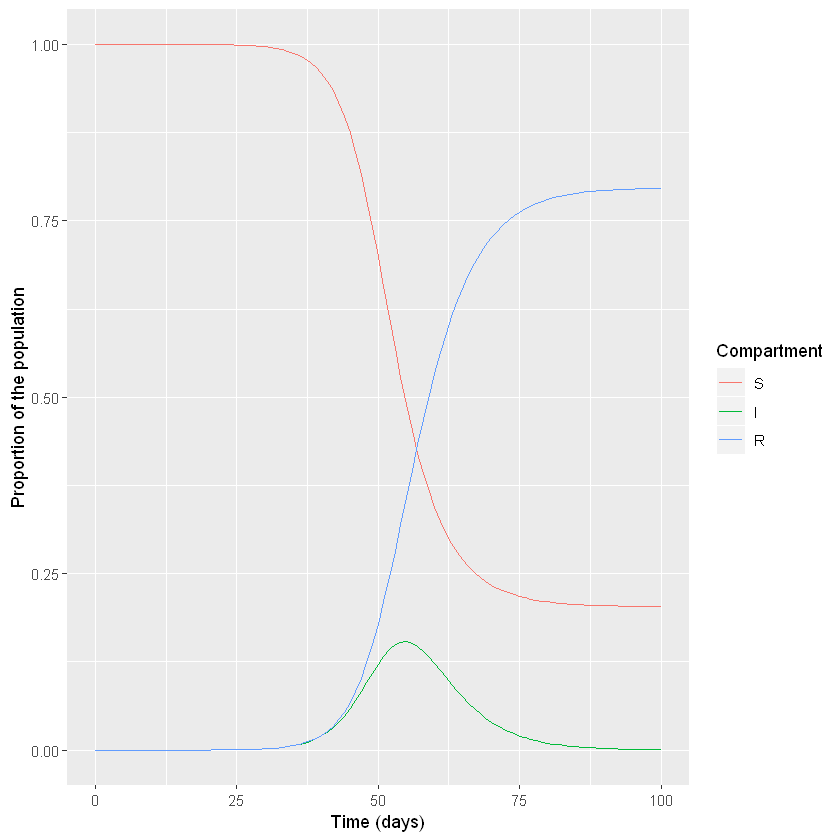

In [1]:
# LOAD THE PACKAGES:
library(deSolve)
library(reshape2)
library(ggplot2)

# MODEL INPUTS:

# Vector storing the initial number of people in each compartment (at timestep 0)
initial_state_values <- c(S = 1000000-1,  # the whole population we are modelling is susceptible to infection
                          I = 1,          # the epidemic starts with a single infected person
                          R = 0)          # there is no prior immunity in the population

# Vector storing the parameters describing the transition rates in units of days^-1
parameters <- c(beta = 0.5,     # the infection rate, which acts on susceptibles
                gamma = 0.25)   # the rate of recovery, which acts on those infected

# TIMESTEPS:

# Vector storing the sequence of timesteps to solve the model at
times <- seq(from = 0, to = 100, by = 1)   # from 0 to 100 days in daily intervals

# SIR MODEL FUNCTION: 

# The model function takes as input arguments (in the following order): time, state and parameters
sir_model <- function(time, state, parameters) {  

    with(as.list(c(state, parameters)), {   # tell R to unpack variable names from the state and parameters inputs    
        
    # Calculating the total population size N (the sum of the number of people in each compartment)
      N <- S+I+R
      
    # Defining lambda as a function of beta and I:
      lambda <- beta * I/N
        
    # The differential equations
      dS <- -lambda * S               # people move out of (-) the S compartment at a rate lambda (force of infection)
      dI <- lambda * S - gamma * I    # people move into (+) the I compartment from S at a rate lambda, 
                                      # and move out of (-) the I compartment at a rate gamma (recovery)
      dR <- gamma * I                 # people move into (+) the R compartment from I at a rate gamma
      
    # Return the number of people in the S, I and R compartments at each timestep 
    # (in the same order as the input state variables)
    return(list(c(dS, dI, dR))) 
    })
  
}

# MODEL OUTPUT (solving the differential equations):

# Solving the differential equations using the ode integration algorithm
output <- as.data.frame(ode(y = initial_state_values, 
                            times = times, 
                            func = sir_model,
                            parms = parameters))

# PLOTTING THE OUTPUT
output_long <- melt(as.data.frame(output), id = "time")                  # turn output dataset into long format

# Adding a column for the proportion of the population in each compartment at each timestep
# One way of calculating this is dividing the number in each compartment by the total initial population size
# We can do this in this case because our population is closed, so the population size stays the same
# at every timestep
output_long$proportion <- output_long$value/sum(initial_state_values)

# Plot this new column
ggplot(data = output_long,                                               # specify object containing data to plot
       aes(x = time, y = proportion, colour = variable, group = variable)) +  # assign columns to axes and groups
  geom_line() +                                                          # represent data as lines
  xlab("Time (days)")+                                                   # add label for x axis
  ylab("Proportion of the population") +                                 # add label for y axis
  labs(colour = "Compartment")                                           # add legend title

### What do you observe when $\beta$ = 0.5 and $\gamma$ = 0.25?

An epidemic occurs, reaching a peak 56 days after introduction of the first infectious case, at which point about 15% of the population are infected. By the end of the epidemic, about 80% of the population have been infected and recovered.

**Modelling a scenario where *beta* drops to 0.1 because an infection control measure is introduced:**

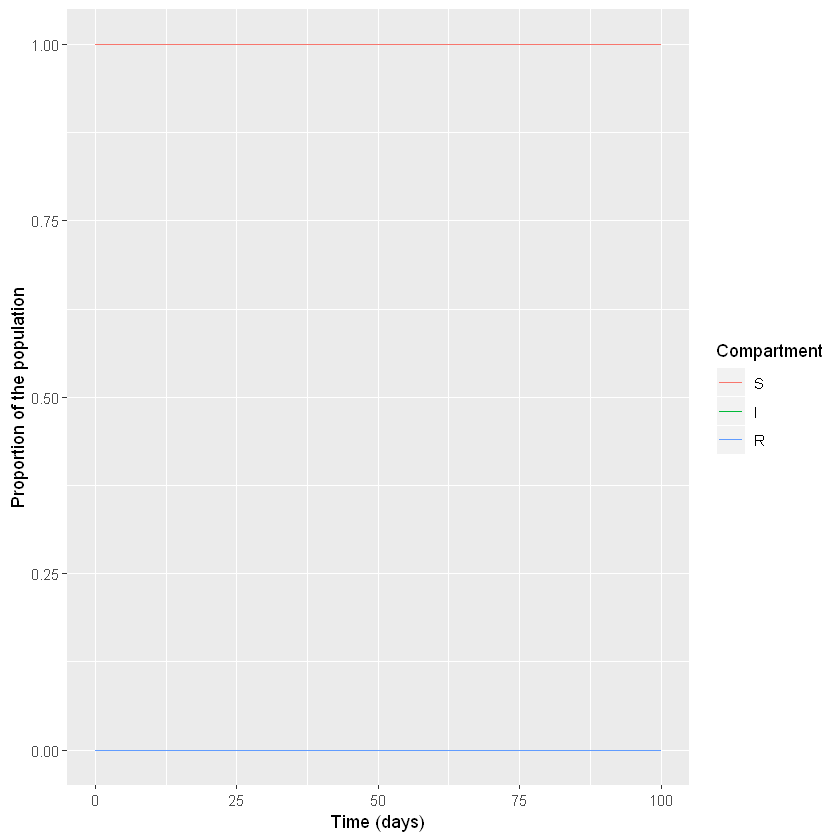

In [2]:
# Vector storing the parameters describing the transition rates in units of days^-1
parameters <- c(beta = 0.1,      # the infection rate
                gamma = 0.25)    # the rate of recovery, which acts on those infected

# Solving the differential equations using the ode integration algorithm
output <- as.data.frame(ode(y = initial_state_values, 
                            times = times, 
                            func = sir_model,
                            parms = parameters))

# PLOTTING THE OUTPUT
output_long <- melt(as.data.frame(output), id = "time")                  # turn output dataset into long format

# Calculating the proportion in each compartment
output_long$proportion <- output_long$value/sum(initial_state_values)

ggplot(data = output_long,                                               # specify object containing data to plot
       aes(x = time, y = proportion, colour = variable, group = variable)) +  # assign columns to axes and groups
  geom_line() +                                                          # represent data as lines
  xlab("Time (days)")+                                                   # add label for x axis
  ylab("Proportion of the population") +                                 # add label for y axis
  labs(colour = "Compartment")                                           # add legend title

### What do you observe when $\beta$ is reduced to 0.1 instead, with $\gamma$ remaining at 0.25?

Under this set of conditions, no epidemic occurs - the number of infected people does not increase following the introduction of a first infectious case.

### Assuming $\beta$ equals 0.1, what value of $\gamma$ do you need in order to get an epidemic? In real life, what could give rise to this change in $\gamma$?

With $\gamma$ around 0.09 or lower, we start to see a small epidemic if we run the model for long enough (ca. 1000 days). Different mechanisms can lead to such a decrease in the recovery rate, corresponding to an increase of the average infectious period, for example strain evolution of the infectious agent or changes in social behaviour.

### Based on your answers to the previous question, can you think of a condition involving $\beta$ and $\gamma$ that is necessary for an epidemic? Test this condition using your code above. 

For an epidemic to happen, the ratio $\beta$/$\gamma$ has to be greater than 1. In other words, to give rise to an epidemic, infectious people have to be **infectious enough** ($\beta$ has to be high enough) for **long enough** ($\gamma$ has to be low enough) to pass on the pathogen - $\beta$ has to be higher than $\gamma$. Because of the relationship between these two parameters, a low infection rate can still lead an epidemic if infected people are infectious for long enough, as you modelled in the previous question.